In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def f(x):
    return 2*x**2 - x**3/3
x = np.linspace(-2, 4, 25)
y = f(x) 

In [13]:
beta = np.cov(x, y, ddof=0)[0, 1]/np.var(x)
alpha = y.mean() - beta * x.mean()
beta

1.0541666666666667

In [15]:
y_ = beta*x + alpha
y_

array([1.75416667, 2.01770833, 2.28125   , 2.54479167, 2.80833333,
       3.071875  , 3.33541667, 3.59895833, 3.8625    , 4.12604167,
       4.38958333, 4.653125  , 4.91666667, 5.18020833, 5.44375   ,
       5.70729167, 5.97083333, 6.234375  , 6.49791667, 6.76145833,
       7.025     , 7.28854167, 7.55208333, 7.815625  , 8.07916667])

deg=1 | MES=10.72195
deg=2 | MES=2.31258
deg=3 | MES=0.00000


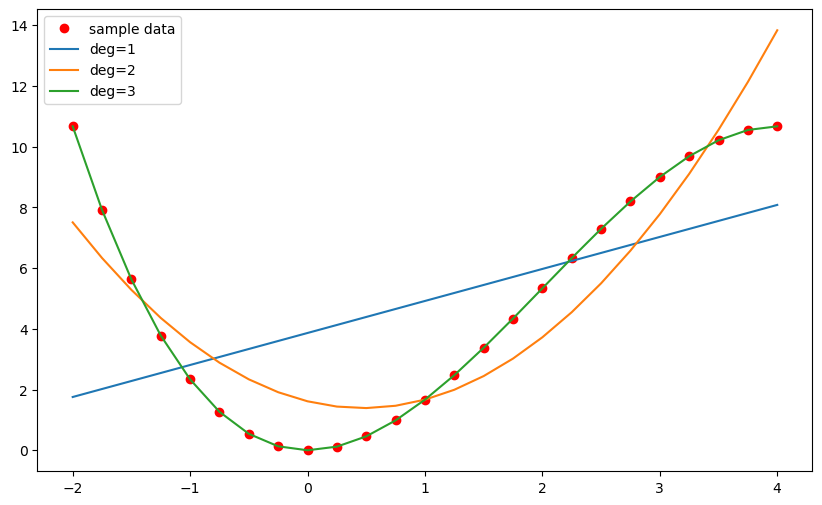

In [18]:
plt.figure(figsize=(10, 6))
plt.plot(x, y, "ro", label="sample data")
for deg in [1, 2, 3]:
    reg = np.polyfit(x, y, deg=deg)
    y_ = np.polyval(reg, x)
    MSE = ((y - y_) ** 2).mean()
    print(f"deg={deg} | MES={MSE:.5f}")
    plt.plot(x, np.polyval(reg, x), label=f"deg={deg}")
    plt.legend()

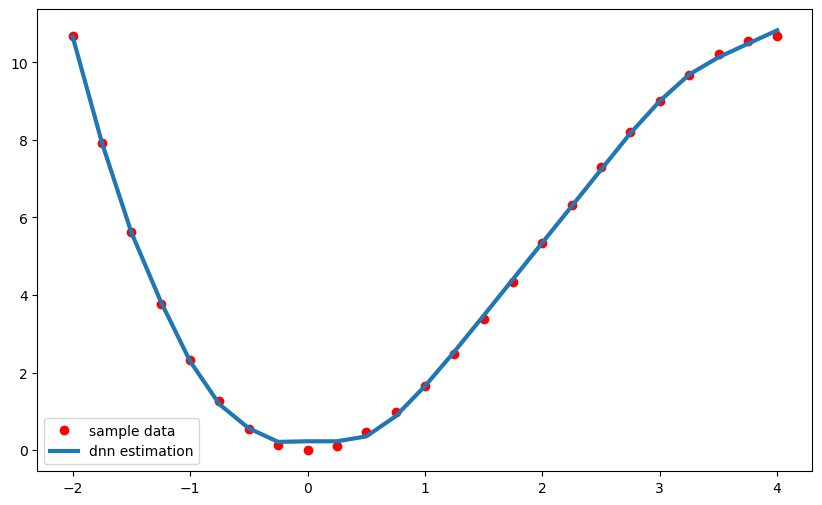

In [27]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=3 * [256],
                     learning_rate_init=0.03,
                     max_iter=5000)
model.fit(x.reshape(-1, 1), y)
MLPRegressor(hidden_layer_sizes=[256, 256, 256], learning_rate_init=0.03,
             max_iter=5000)
y_ = model.predict(x.reshape(-1, 1))
MSE = ((y - y_) ** 2).mean()
MSE
0.021662355744355866
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'ro', label='sample data')
plt.plot(x, y_, lw=3.0, label='dnn estimation')
plt.legend()

In [28]:
x.reshape(-1, 1).shape

(25, 1)